# **Project Name**    - Exploratory Data Analysis of OLA Ride Insights.

# **Project Summary -**

The Ola Ride Insights project focused on analyzing Ola’s ride-sharing data to generate actionable business intelligence. It involved data cleaning, preprocessing, and SQL query development to explore bookings, cancellations, ratings, and payment patterns. An interactive Power BI dashboard and Streamlit application were built to visualize trends such as ride volumes, revenue, and customer vs. driver ratings. Key findings highlighted peak demand periods for better driver allocation, revenue concentration across payment methods, and variations in customer satisfaction by vehicle type. Overall, the project delivered a complete analytics solution to help Ola optimize operations, improve customer experience, and support strategic decision-making.

# **GitHub Link -** https://github.com/PrekshaDwivedi07/OLA_RIDE_Insights.git

# **Problem Statement**

The rise of ride-sharing platforms has transformed urban mobility, offering convenience and affordability to millions of users. OLA, a leading ride-hailing service, generates vast amounts of data related to ride bookings, driver availability, fare calculations, and customer preferences. However, deriving actionable insights from this data remains a challenge. To enhance operational efficiency, improve customer satisfaction, and optimize business strategies, this project focuses on analyzing OLA’s ride-sharing data. By leveraging data analytics, visualization techniques, and interactive applications, the goal is to extract meaningful insights that can drive data-informed decisions. The project will involve cleaning and processing raw ride data, performing exploratory data analysis (EDA), developing a dynamic Power BI dashboard, and creating a Streamlit-based web application to present key findings in an interactive and user-friendly manner.

Business Objective

The primary objective of this project is to leverage Ola’s ride-sharing data to uncover patterns and insights that improve operational efficiency, customer satisfaction, and revenue optimization. By analyzing bookings, cancellations, ratings, and payment trends, the project aims to help Ola forecast demand, allocate drivers effectively, optimize pricing strategies, and detect anomalies or fraudulent activities. Ultimately, the goal is to transform raw ride data into actionable intelligence that supports data-driven decision-making and strengthens Ola’s competitive advantage in the ride-hailing market.


## ***Data Wrangling***

In [ ]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/OLA_DataSet.xlsx - July.csv')


In [ ]:
data.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')

In [ ]:
data.shape

(91295, 20)

In [ ]:
data

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 3:15:00,3:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 9:02:00,9:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91290,2024-07-21 4:45:00,4:45:00,CNR5005540092,Success,CID662491,eBike,Hebbal,Chamarajpet,161.0,80.0,NaN,NaN,No,NaN,431,Cash,44,3.8,4.2,https://cdn-icons-png.flaticon.com/128/6839/68...
91291,2024-07-23 12:39:00,12:39:00,CNR8269090277,Success,CID816309,Auto,Sarjapur Road,JP Nagar,217.0,95.0,NaN,NaN,No,NaN,464,UPI,18,3.1,4.6,https://cdn-icons-png.flaticon.com/128/16526/1...
91292,2024-07-14 9:52:00,9:52:00,CNR2236810751,Success,CID755830,Prime Sedan,Koramangala,Jayanagar,112.0,145.0,NaN,NaN,No,NaN,232,Cash,46,3.8,3.1,https://cdn-icons-png.flaticon.com/128/14183/1...
91293,2024-07-25 1:12:00,1:12:00,CNR1649638504,Canceled by Driver,CID737217,eBike,Shivajinagar,Vijayanagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,537,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

### **Dataset Information -**

This dataset consists of 103,024 ride entries from Ola, containing detailed booking, customer, driver, and ride-related information. It captures various aspects such as booking status, locations, cancellations, ride distance, payment methods, ratings, and revenue. The dataset is designed to analyze ride-sharing patterns, operational efficiency, customer experience, and driver performance in order to extract meaningful business insights.


##Column Descriptions

Date: The date on which the booking was made.

Time: The time of booking.

Booking_ID: A unique identifier for each ride booking.

Booking_Status: Indicates whether a ride was completed, cancelled, or left incomplete.

Customer_ID: A unique identifier assigned to each customer.

Vehicle_Type: Specifies the type of vehicle booked (e.g., Mini, Sedan, Prime, Auto).

Pickup_Location: The starting point of the ride.

Drop_Location: The destination of the ride.

V_TAT: Vehicle Turnaround Time (time taken by the driver/vehicle to reach the pickup point).

C_TAT: Customer Turnaround Time (time taken by the customer to board the ride after the vehicle arrives).

Canceled_Rides_by_Customer: Records rides cancelled by the customer, along with reasons.

Canceled_Rides_by_Driver: Records rides cancelled by the driver, along with reasons (e.g., personal, vehicle issue).

Incomplete_Rides: Rides that were not completed due to various interruptions.

Incomplete_Rides_Reason: The reason for incomplete rides (e.g., technical issues, disputes).

Booking_Value: The fare/amount charged for the booking.

Payment_Method: The mode of payment (e.g., UPI, card, cash, wallet).

Ride_Distance: The distance covered during the ride in kilometers.

Driver_Ratings: The rating given by customers to drivers (on a 1–5 scale).

Customer_Rating: The rating given by drivers to customers (on a 1–5 scale).

Vehicle Images: Reference images of the booked vehicle type.

### Finding Duplicates and Removing Duplicates

In [ ]:
data.duplicated().value_counts()

,count
False,103024


#### Missing Values/Null Values

In [ ]:
data.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,39057
C_TAT,39057


In [ ]:
data.dtypes

,0
Date,object
Time,object
Booking_ID,object
Booking_Status,object
Customer_ID,object
Vehicle_Type,object
Pickup_Location,object
Drop_Location,object
V_TAT,float64
C_TAT,float64


In [ ]:
data.describe()

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
std,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957
min,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000


###**Data Vizualization**

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data

## Univariate Analysis

### BOX PLOT

### Box Plot of Ride Distance by Vehicle Type

Box plot are plotted to visualize the Distribution , spread of data and identify the  outliers in Data

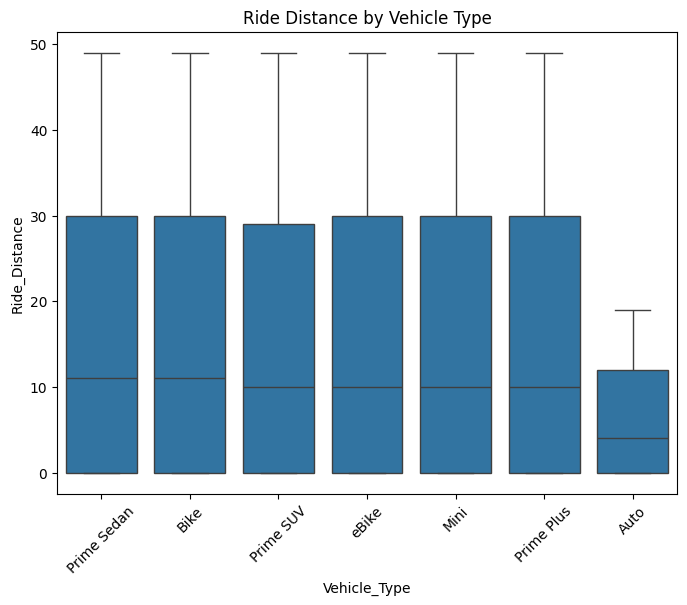

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Vehicle_Type", y="Ride_Distance", data=data)
plt.title("Ride Distance by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

### Insights

- The fare amounts (Graph 1) show a similar median and interquartile range across all vehicle types, including premium categories like Prime Sedan, Prime SUV, and basic types like Auto, Bike, and eBike.

- However, all vehicle types have significant outliers (high fares), suggesting that long or expensive trips occur in all categories, not just premium ones.

### Box Plot of Booking Value by Vehicle Type

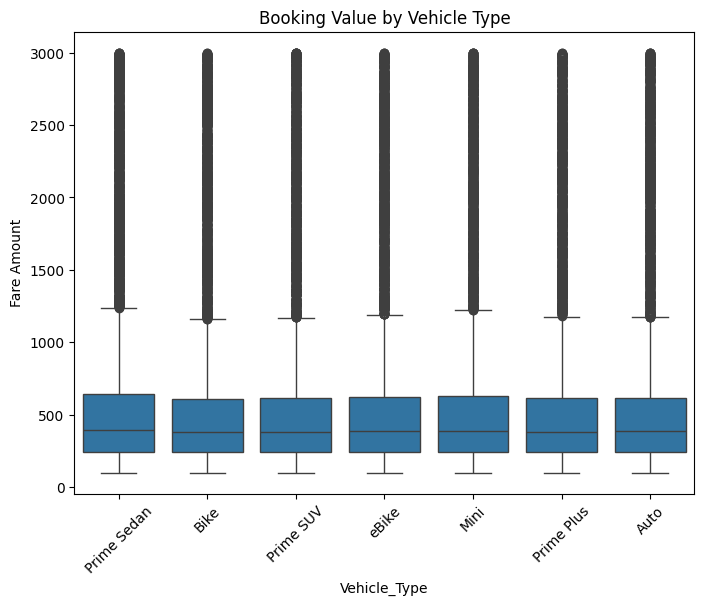

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Vehicle_Type", y="Booking_Value", data=data)
plt.title("Booking Value by Vehicle Type")
plt.xticks(rotation=45)
plt.ylabel("Fare Amount")
plt.show()


## Insights

- Auto rides have a much lower median and maximum ride distance compared to other vehicle types.

- This suggests Autos are mostly used for short-distance travel, aligning with their role in urban transport.

##  HISTOGRAM

Histogran represents the distribution of numerical values .They provide a visual way to see the shape of data's distribution.

### Histogram of  Ride Distance distribution

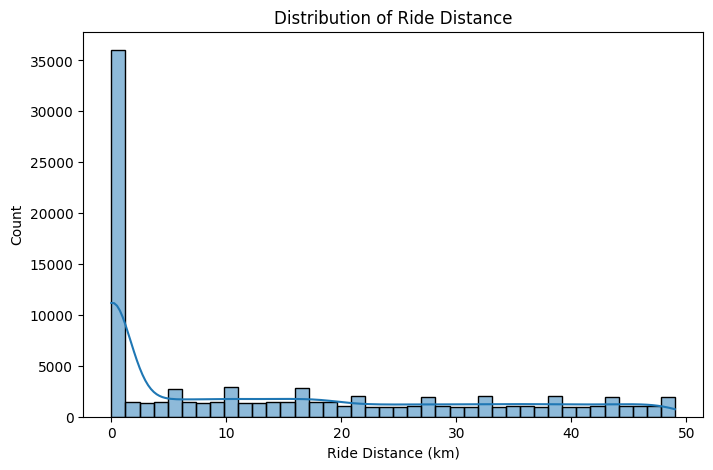

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data["Ride_Distance"], bins=40, kde=True)
plt.title("Distribution of Ride Distance")
plt.xlabel("Ride Distance (km)")
plt.show()

## Insights

Most rides are under 2 km, indicating high demand for short-distance travel.

Few long-distance rides (up to 50 km) exist, but they are rare.

The distribution is right-skewed, meaning average distance is pulled higher by a few long trips.

### Histogram of Booking Value distribution

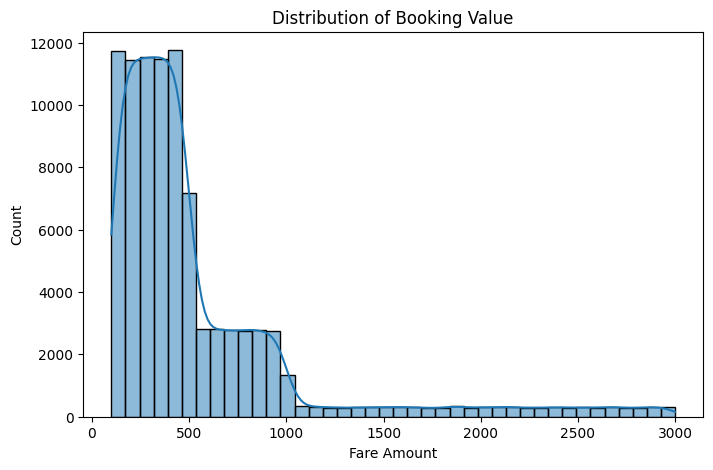

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data["Booking_Value"], bins=40, kde=True)
plt.title("Distribution of Booking Value")
plt.xlabel("Fare Amount")
plt.show()

## Insights

Majority of bookings fall between 100–500, indicating this is the typical customer spend range.

Right-skewed distribution shows a small number of high-value bookings (above 1000), which may represent premium customers.

Potential outliers exist beyond 2000, suggesting the need for separate treatment in analysis or modeling.

### Histogram of Driver Ratings Distribution

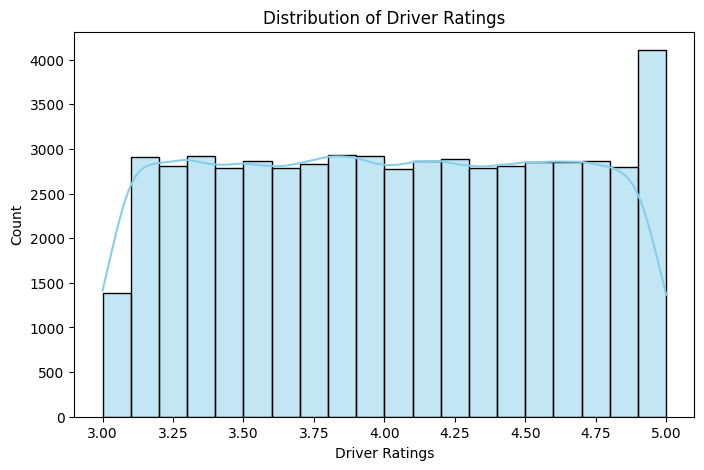

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data["Driver_Ratings"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Driver Ratings")
plt.xlabel("Driver Ratings")
plt.show()


## Insights

Ratings are mostly high – the majority of drivers are rated above 3.5, with many clustered between 4.0 and 5.0.

Peak at 5.0 – a noticeable spike at the maximum rating suggests many users give full marks.

Low ratings are rare – very few drivers receive ratings near 3.0, indicating generally positive customer experiences.

### Histogram of Customer Ratings Distribution

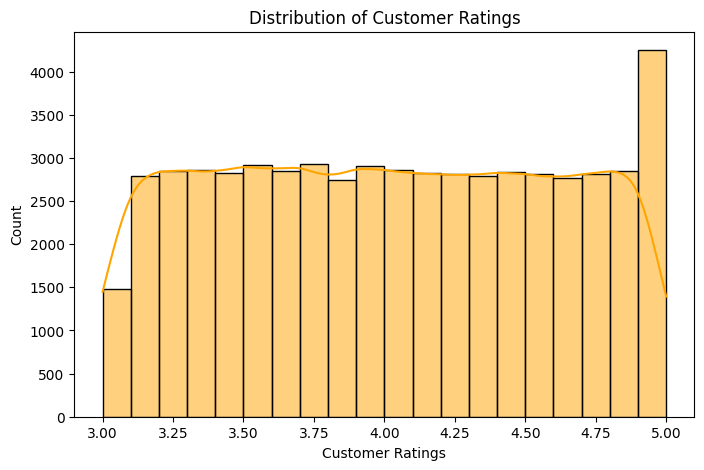

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data["Customer_Rating"], bins=20, kde=True, color="orange")
plt.title("Distribution of Customer Ratings")
plt.xlabel("Customer Ratings")
plt.show()


## Insights

Mostly positive ratings – the majority of customers rate above 3.5, with a strong concentration in the 4.0–5.0 range.

High proportion of perfect scores – just like driver ratings, there’s a noticeable spike at 5.0, showing customers often give maximum ratings.

Low dissatisfaction – very few ratings are close to 3.0, suggesting overall good experiences from the drivers’ perspective.

### BARPLOT / COUNTPLOT

A bar plot is a type of chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

### Countplot of Booking Status distribution

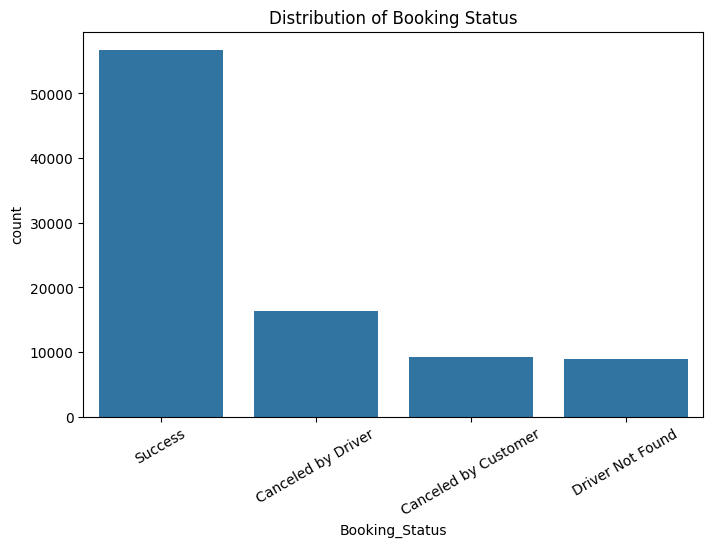

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Booking_Status", data=data, order=data["Booking_Status"].value_counts().index)
plt.title("Distribution of Booking Status")
plt.xticks(rotation=30)
plt.show()

## Insights

High success rate – the majority of bookings are completed successfully, showing good platform reliability.

Driver cancellations are more frequent than customer cancellations, highlighting a potential issue with driver availability or incentives.

Driver not found cases are relatively low but still significant, suggesting possible gaps in driver supply during certain times or locations.

### Bar plot of Average Booking Value by Payment Method

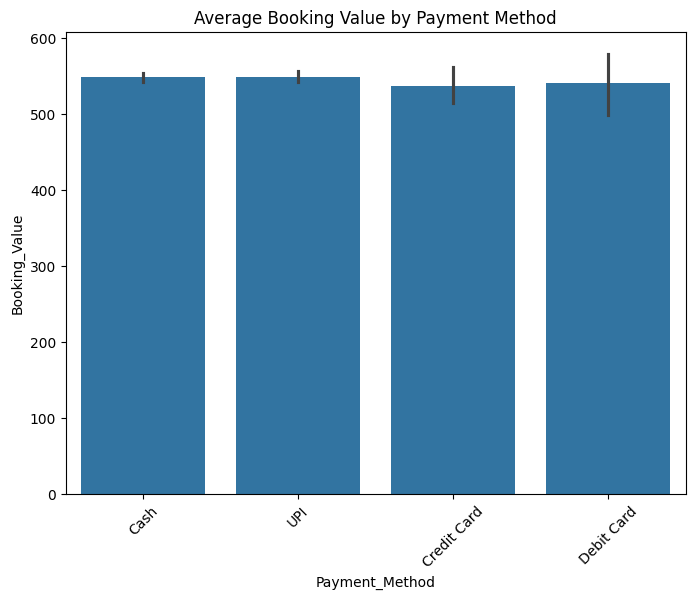

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Payment_Method", y="Booking_Value", data=data)
plt.title("Average Booking Value by Payment Method")
plt.xticks(rotation=45)
plt.show()

## Insights

Similar averages across methods – booking values are fairly consistent, all hovering around 540–550 regardless of payment type.

UPI and Cash slightly higher – both show marginally higher average booking values compared to Credit/Debit cards.

Greater variability in cards – Credit and Debit cards show wider error bars, suggesting more fluctuation in booking amounts compared to Cash and UPI.

### Bar plot of Average Ride Distance by Vehicle Type

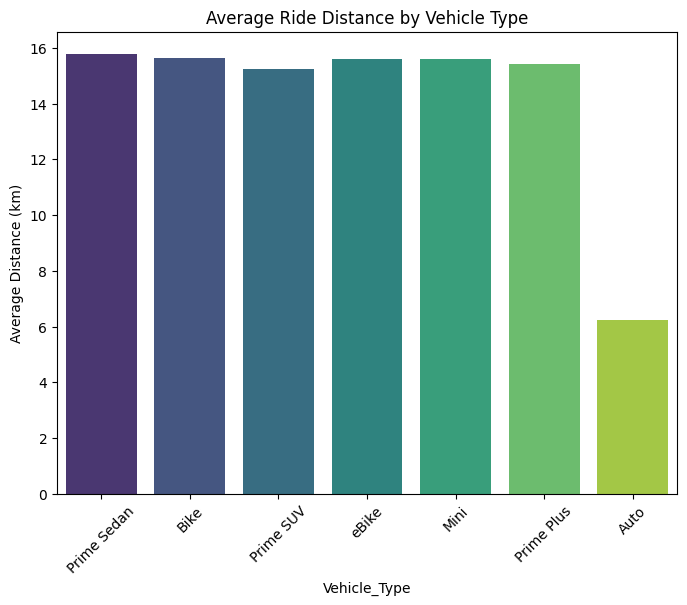

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Vehicle_Type", y="Ride_Distance", data=data, estimator="mean", ci=None, palette="viridis")
plt.title("Average Ride Distance by Vehicle Type")
plt.xticks(rotation=45)
plt.ylabel("Average Distance (km)")
plt.show()


## Insights

Long-distance rides – Premium options like Prime Sedan and Prime SUV average the longest trips (~15–16 km), showing they’re preferred for longer journeys.

Auto is short-distance – Autos have a much lower average ride distance (~6 km), making them the go-to choice for short, local trips.

Other categories (Bike, Mini, eBike, Prime Plus) all hover around ~15 km, suggesting they compete in the same mid-to-long distance segment.

## Bivariate Analysis

### SCATTER PLOT

A scatter plot is a type of data visualization that uses dots to represent the values of two numerical variables. Scatter plots are used to observe relationships between variables.

### Scatter plot of Ride Distance vs Booking Value (by Status)

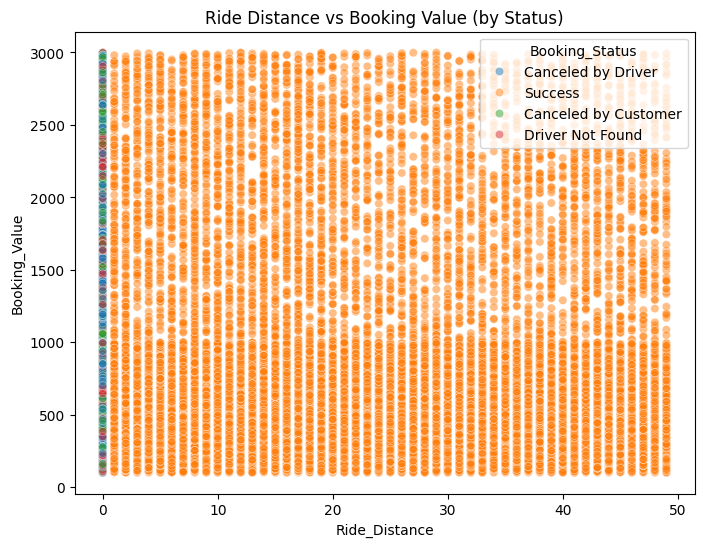

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Ride_Distance", y="Booking_Value", hue="Booking_Status", data=data, alpha=0.5)
plt.title("Ride Distance vs Booking Value (by Status)")
plt.show()

## Insights

Strong positive relationship – longer rides generally lead to higher booking values, which is expected since fare is distance-driven.

Successful rides dominate – almost all long-distance and high-value bookings are successful, while cancellations are concentrated at very short distances.

Cancellations cluster near zero distance – “Canceled by Driver,” “Canceled by Customer,” and “Driver Not Found” mostly occur before the ride really begins, implying cancellations typically happen in the booking/assignment stage.

### LINE PLOT

Line Plot Connects data points with a line to show trends over time across continuous variable.

### Line Plot of  Trend of Average Booking Value Over Dates

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
daily_fares = data.groupby(data["Date"].dt.date)["Booking_Value"].mean().reset_index()

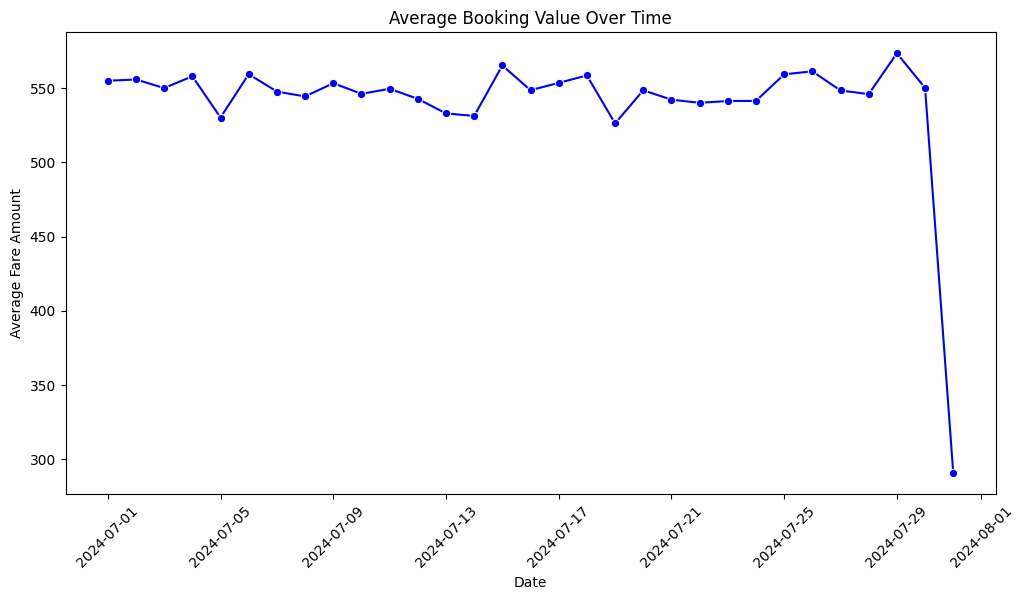

In [ ]:

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Booking_Value", data=daily_fares, marker="o", color="blue")
plt.title("Average Booking Value Over Time")
plt.xlabel("Date")
plt.ylabel("Average Fare Amount")
plt.xticks(rotation=45)
plt.show()

## Insights

Stable trend overall – the average fare remains consistent around 540–560 across most of July 2024.

Small fluctuations – minor dips (e.g., July 5 & July 19) suggest occasional short-term variations, possibly due to promotions, demand changes, or supply shifts.

Sharp drop at month-end – on July 31, there’s a sudden fall to below 300, likely an anomaly (data issue or unusual event) rather than a true business trend.

## PIE CHART

Pie chart is used to visualize the proportions of different categories within a whole dataset. I's circular statistical graph, where each slice of the pie represents a category, and the size of the slice is proportional to the category's contribution to the overall data

### Pie chart of Payment Method Distribution

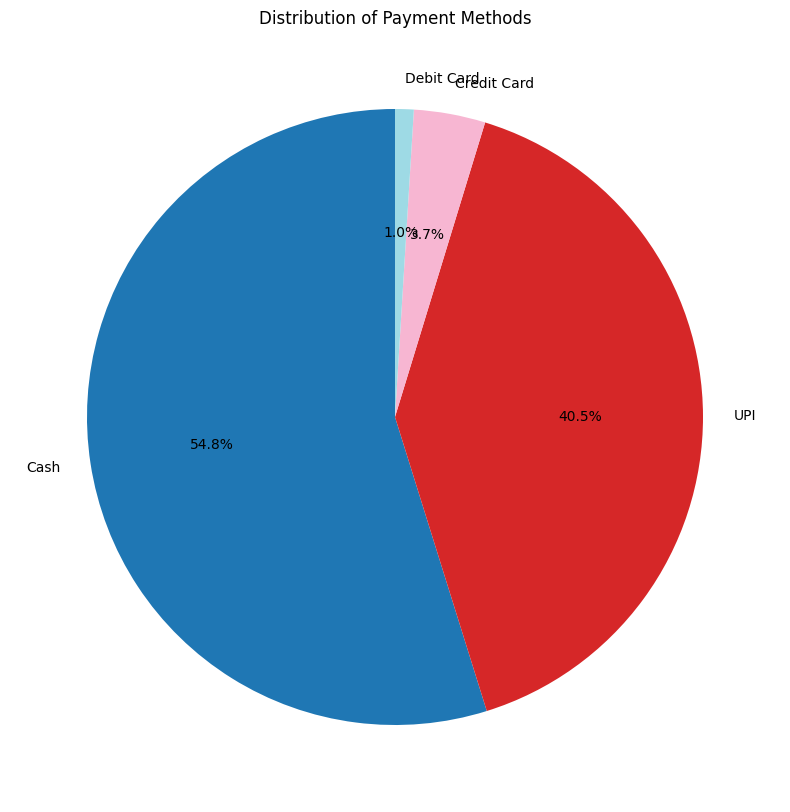

In [ ]:
plt.figure(figsize=(10,10))
data["Payment_Method"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="tab20")
plt.title("Distribution of Payment Methods")
plt.ylabel("")
plt.show()


## Insights

Cash dominates – over 50% (54.8%) of bookings are paid in cash, showing customers still heavily prefer offline payment.

UPI is strong – about 40.5% of payments come through UPI, highlighting rapid adoption of digital wallets and instant payments.

Cards are minimal – Credit Card (3.7%) and Debit Card (1.0%) usage is very low, suggesting limited reliance on traditional card-based payments.

### Pie chart of Vehicle Type Share

In [ ]:
import plotly.express as px

fig = px.pie(
    data,
    names="Vehicle_Type",
    title="Share of Vehicle Types in Total Rides",
    hole=0,
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.show()


## Insights

Even distribution – all vehicle types (Sedan, SUV, Bike, Auto, Mini, eBike, Prime Plus) contribute almost equally, each around 14–15%.

No single dominant category – the fleet usage is well-balanced, meaning demand is spread evenly across vehicle types.

Slight edge for Prime Sedan – with 14.5%, Prime Sedan has the highest share, though only marginally above the rest.

### Multivariable Analysis

### PAIR PLOT

Pair plot visualizes the pairwise relationship between variables. It includes scatter plots for relationships and histogram or density plots for individual distributions.

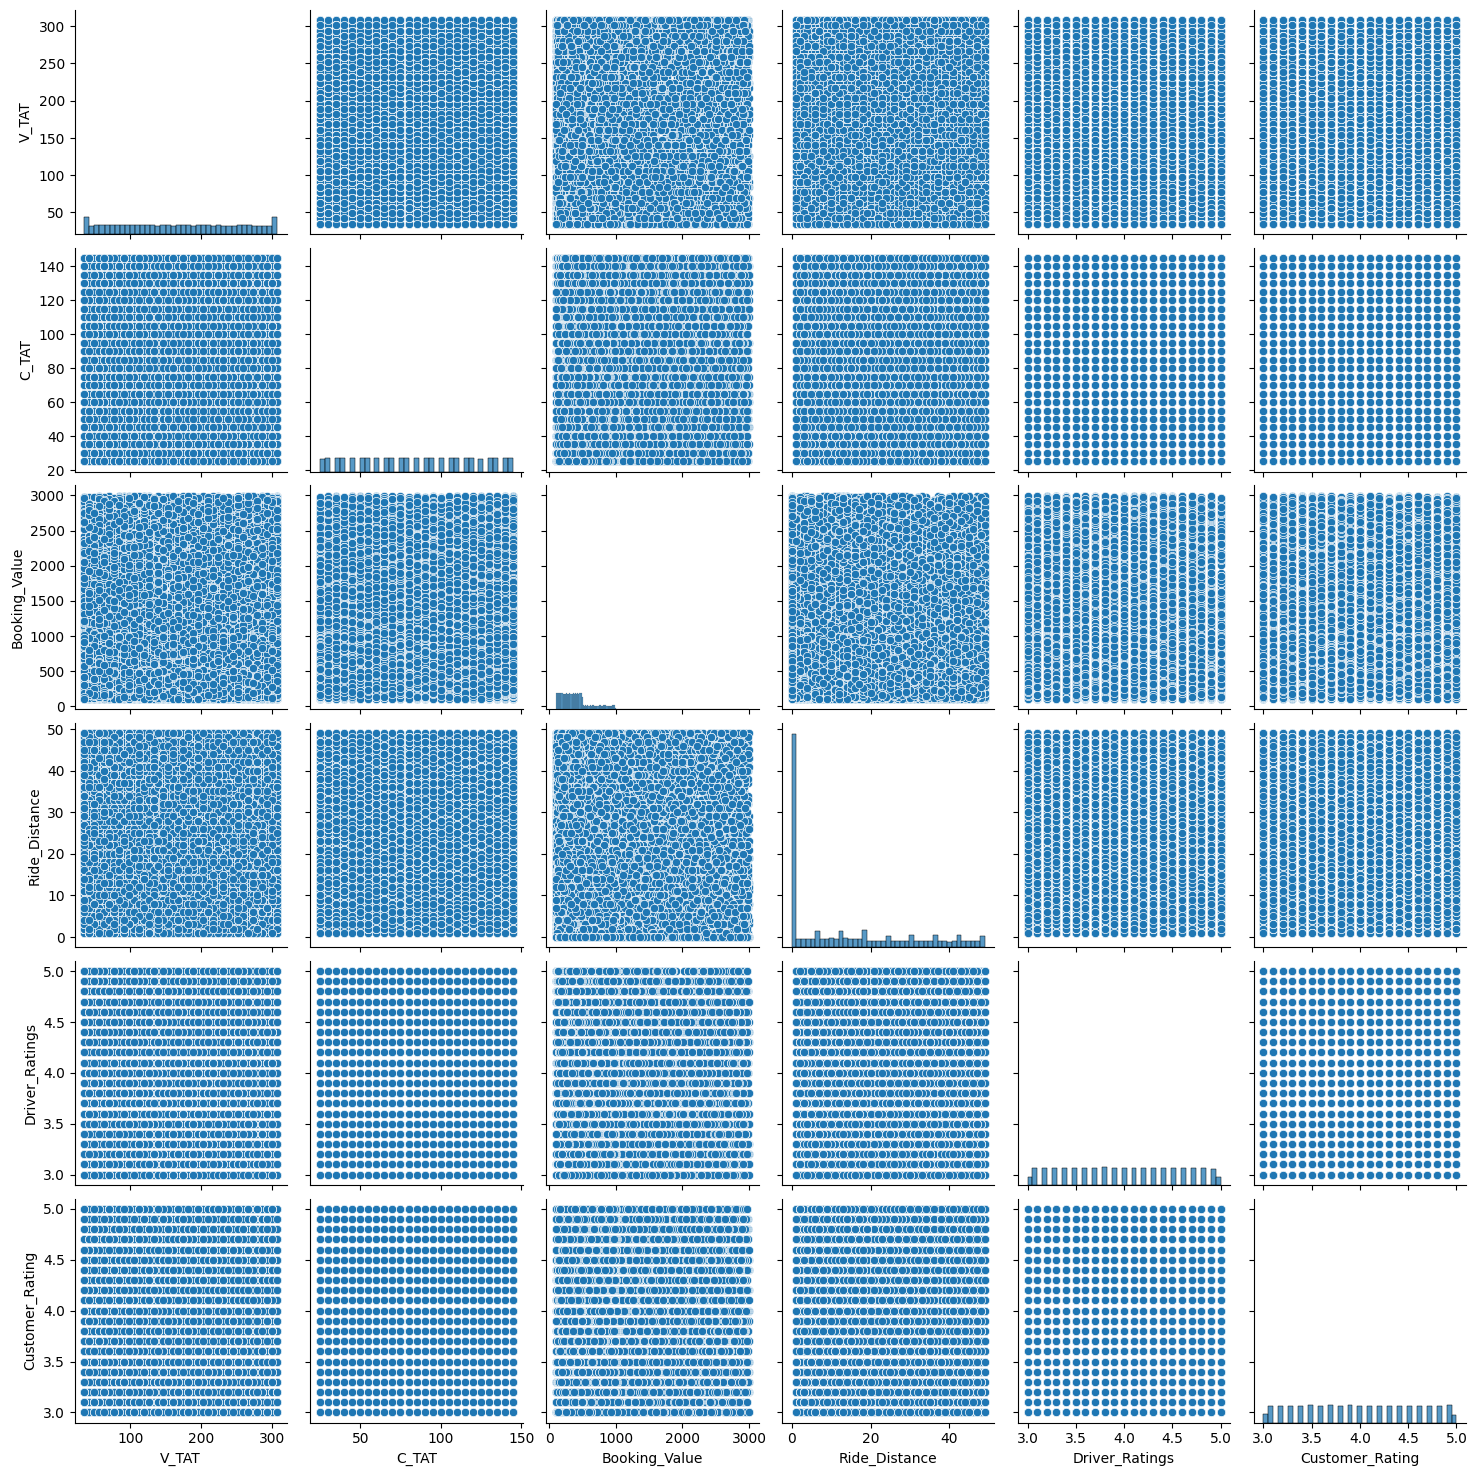

In [ ]:
sns.pairplot(data)
plt.show()

### HEATMAP

A heatmap uses color intensities to represent the strength of relationships correlation between numeric variables in a dataset.

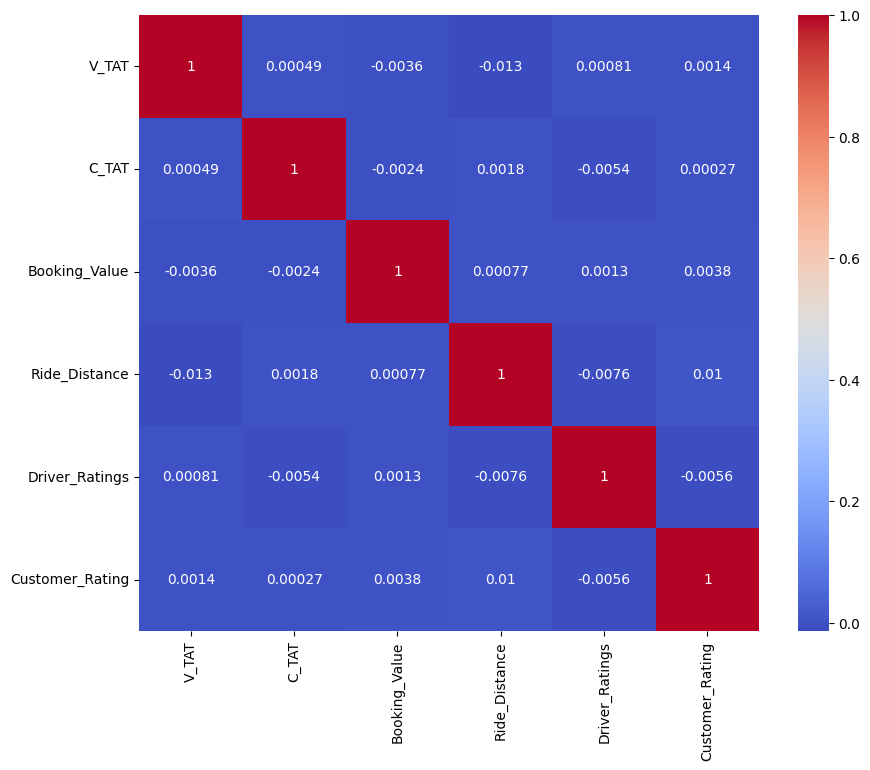

In [ ]:
plt.figure(figsize=(10,8))
num_col = data.select_dtypes(include=np.number)
sns.heatmap(num_col.corr(), annot= True, cmap='coolwarm')
plt.show()

## Conclusion -

**This EDA has revealed meaningful patterns in ride-hailing operations, customer behavior, and platform dynamics.**

**Booking Value & Distance Trends:** Most rides fall in the affordable range (₹100–₹500) with longer trips naturally driving higher fares. Premium vehicle types (Prime Sedan, SUV) are used for longer journeys, while Autos dominate short-distance rides.

**Ratings & Experience:** Both drivers and customers consistently receive high ratings (4.0–5.0), with a significant portion being perfect scores, suggesting overall satisfaction and positive ride experiences.

**Booking Outcomes:** The majority of bookings are successful, though cancellations—particularly by drivers—remain a notable issue, highlighting potential areas for operational improvements.

**Payment Preferences:** Cash remains the most dominant payment method, followed by UPI, while card usage is minimal. Average booking values remain consistent across payment types, though variability is higher with cards.

**Vehicle Distribution:** Rides are evenly spread across different vehicle categories, ensuring balanced fleet utilization without over-dependence on any single type.

**Time Trends:** Average booking value has remained stable over time, with only minor fluctuations, though an end-of-month dip may indicate a data anomaly or unusual event.

**In conclusion**, this analysis offers valuable insights for stakeholders such as operations teams, product managers, and strategists. It highlights stable demand patterns, strong customer satisfaction, and balanced fleet usage while pointing out challenges in driver cancellations and the heavy reliance on cash payments. These findings provide a foundation for deeper analysis into customer segments, cancellation drivers, and payment adoption strategies to support data-driven decision-making.